In [1]:
##########################     R script   ##########################

suppressMessages(library(Seurat))
suppressMessages(library(ggplot2))
suppressMessages(library(ggrepel))
suppressMessages(library(ggpubr))
suppressMessages(library(cowplot))
suppressMessages(library(dplyr))
                 
options(warn=-1)

In [2]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /share/home/zhangyr/.conda/envs/web_jupyter/lib/libopenblasp-r0.3.17.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] dplyr_1.0.9        cowplot_1.1.1      ggpubr_0.4.0       ggrepel_0.9.1     
[5] ggplot2_3.3.6      sp_1.4-7           SeuratObject_4.1.0 Seurat_4.1.1      

loaded via a namespace (and not attached):
  [1] Rtsne_0.16            colorspace_2.0-3      ggsignif_0.6.3       
  [4] deldir_1.0-

In [3]:
ALLCELLS_META_PATH = '/project_path/meta/allCells_meta.csv'
SUBCLUSTERS_COUNT_PATH = '/project_path/cellProportion_allSubs_CD45.csv'

### Define compaired group

In [4]:
compaired = list(c("Pre_CR", "Pre_NCR"),c('Post_CR','Post_NCR'),
                  c('Pre_NCR','Post_NCR'),c('Pre_CR','Post_CR'))

### Define functions

In [5]:
plot_boxplot = function(plot_data, title){
    sigf_data = lapply(levels(plot_data$treat_group),function(g){
        filter_outilers(plot_data[which(plot_data$treat_group == g),], 'prop')
    })
    sigf_data = do.call('rbind',sigf_data)    
    p = ggplot(plot_data,
       aes(x=treat_group,y=prop,fill = treat_group, alpha=0.8))+
      geom_boxplot(colour='gray30',width=0.8)+
      ylab("")+
      theme_bw()+theme(
        panel.border = element_blank(),
        panel.grid = element_blank(),
        axis.line.x.bottom = element_line(),
        axis.line.y.left = element_line(),
        axis.ticks.x = element_blank(),
        axis.text.x = element_blank()
      )+ggtitle(title)+
      scale_fill_manual(values = c("#F0E3A4", "#E9B424", "#CCE2E3", "#80B9B9"))+
      geom_signif(mapping = aes(x=treat_group,y=prop), 
                            manual = F,
                            data = sigf_data, inherit.aes=F,
                            comparisons = compaired,step_increase = 0.1,
                            test.args = list(exact = T),
                            map_signif_level = F,test = wilcox.test,textsize=2.8)
    return(p)
}

celltype_proportion = function(sub_meta, sample_n){

    gg = group_by(sub_meta, treat_sample)
    summr_data = summarise(gg,
                           count = n(),
                           treat_group = unique(treat_group),
                           sample = unique(sample),
                           treat = unique(treat),
                           group = unique(group),
                           treat_sample = unique(treat_sample)
                      )
    
    summr_data = as.data.frame(summr_data)
    
    sample_n = as.numeric(sample_n[summr_data$treat_sample])
    summr_data$prop = summr_data$count/sample_n
    summr_data$treat_group = factor(summr_data$treat_group,levels = c('Pre_CR','Post_CR','Pre_NCR','Post_NCR'))
    
    return(summr_data)
}

filter_outilers = function(data, col_lab){
    qq = quantile(data[, col_lab])
    A = qq[2] - 1.5*(qq[4] - qq[2])
    B = qq[4] + 1.5*(qq[4] - qq[2])
    data = data[which(data[,col_lab]<=B),]
    data = data[which(data[,col_lab]>=A),]
    return(data)
}

## Proportions of major cell clusters
* Figure 1G; Figure S1F; Figure S1J;

In [6]:
meta = read.csv(ALLCELLS_META_PATH,row.names=1,stringsAsFactors = F)
head(meta)

,n_genes_by_counts,total_counts,pct_counts_hb,pct_counts_mt,pct_counts_hb.1,pct_counts_rb,treat,sample,group,treat_group,majorCluster,subCluster,if_CD3,if_CD45,treat_sample,if_CD8,if_CD4
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>
AAACCCAAGACTCGAG-1-Pre-A,4658,23259,0.01289823,2.622641,0.01289823,12.03405,Pre,P001,NCR,Pre_NCR,Endothelial cells,TEC-IGKC,0,0,Pre_P001,0,0
AAACCCACAAATCAAG-1-Pre-A,2210,8586,0.05823434,2.201258,0.05823434,18.92616,Pre,P001,NCR,Pre_NCR,T cells,CD4+ Tem,1,1,Pre_P001,0,0
AAACCCAGTCATTCCC-1-Pre-A,476,691,0.00000000,2.315485,0.00000000,16.35311,Pre,P001,NCR,Pre_NCR,Pericytes,PC-IGHG1,0,0,Pre_P001,0,0
AAACCCAGTTAGTCGT-1-Pre-A,1764,4515,0.00000000,3.034330,0.00000000,22.85714,Pre,P001,NCR,Pre_NCR,T cells,CD8+ Tex-SPRY1,1,1,Pre_P001,1,0
AAACCCATCTACGGTA-1-Pre-A,1466,4442,0.02251238,3.714543,0.02251238,26.63215,Pre,P001,NCR,Pre_NCR,T cells,CD4+ Tcm,1,1,Pre_P001,1,0
AAACGAAAGAGGTCGT-1-Pre-A,3812,13020,0.06912442,2.096774,0.06912442,10.76805,Pre,P001,NCR,Pre_NCR,Endothelial cells,Artery,0,0,Pre_P001,0,0


In [7]:
gg = group_by(meta, treat_sample)
sample_count = summarise(gg,
                         count = n(),
                         CD45_count = sum(if_CD45),
                         CD3_count = sum(if_CD3),
                         CD8_count = sum(if_CD8),
                         CD4_count = sum(if_CD4),
                         treat_group = unique(treat_group),
                         sample = unique(sample),
                         treat = unique(treat),
                         group = unique(group)
                        )
sample_count = as.data.frame(sample_count)
rownames(sample_count) = sample_count$treat_sample
sample_count

,treat_sample,count,CD45_count,CD3_count,CD8_count,CD4_count,treat_group,sample,treat,group
,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
Post_P001,Post_P001,9143,4232,1679,441,215,Post_NCR,P001,Post,NCR
Post_P002,Post_P002,7586,3947,2614,968,251,Post_CR,P002,Post,CR
Post_P003,Post_P003,8556,5891,4155,951,884,Post_CR,P003,Post,CR
Post_P004,Post_P004,9351,2048,1283,528,132,Post_NCR,P004,Post,NCR
Post_P009,Post_P009,9197,3791,2344,879,328,Post_NCR,P009,Post,NCR
Post_P011,Post_P011,12256,8465,7162,4397,723,Post_CR,P011,Post,CR
Post_P014,Post_P014,7765,6262,4272,2525,399,Post_NCR,P014,Post,NCR
Pre_P001,Pre_P001,5980,3736,1679,193,205,Pre_NCR,P001,Pre,NCR
Pre_P002,Pre_P002,5765,3673,2857,1271,525,Pre_CR,P002,Pre,CR


### Figure 1G: Fraction of CD3+ T cells

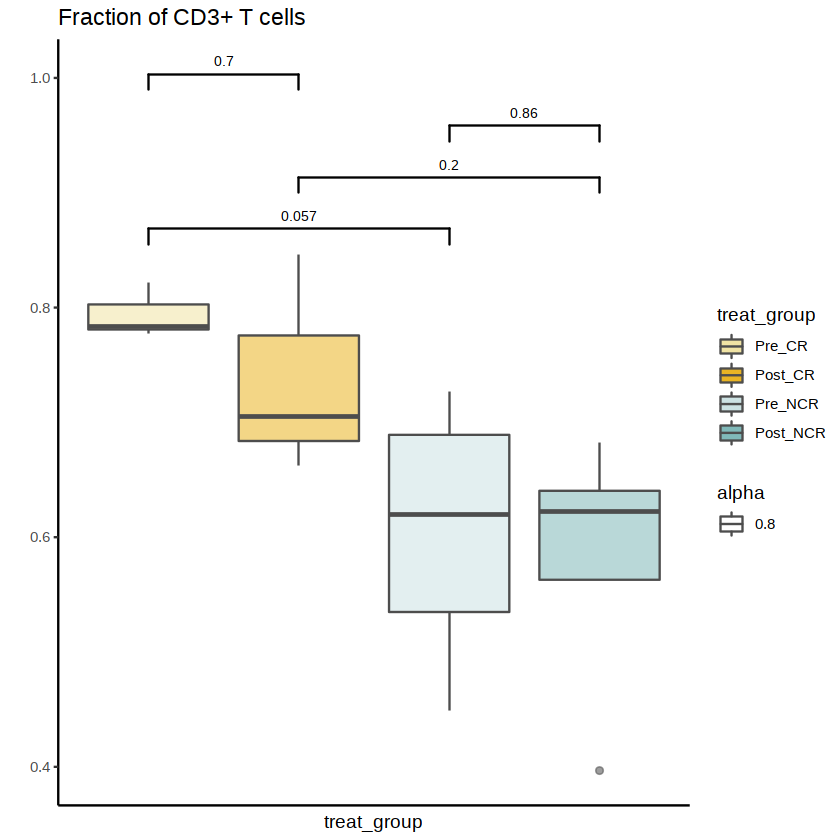

In [8]:
plot_data = data.frame(prop = sample_count$CD3_count/sample_count$CD45_count,
                       treat_group = factor(sample_count$treat_group, levels = c('Pre_CR','Post_CR','Pre_NCR','Post_NCR'))
                      )
plot_boxplot(plot_data, 'Fraction of CD3+ T cells')

### Figure S1H: Fraction of malignant epithelial cells

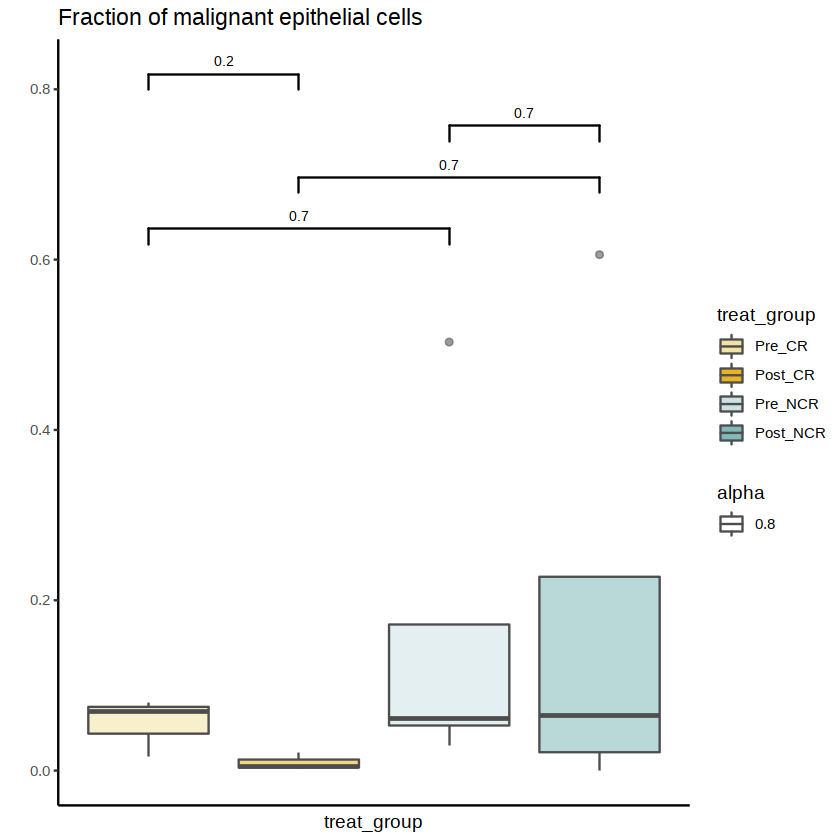

In [9]:
sub_meta = meta[which(meta$subCluster == 'Malignant_Epi'),]
gg = group_by(sub_meta, treat_sample)
malig_data = summarise(gg,
                      count = n(),
                      treat_group = unique(treat_group),
                      sample = unique(sample),
                      treat = unique(treat),
                      group = unique(group)
                      )
malig_data = as.data.frame(malig_data)
malig_data = rbind(malig_data, c('Pre_P014',0,'Post_NCR','P014','Post','NCR'))

malig_data$prop = as.numeric(malig_data$count)/sample_count[malig_data$treat_sample,]$count
malig_data$treat_group = factor(malig_data$treat_group,levels = c('Pre_CR','Post_CR','Pre_NCR','Post_NCR'))

plot_boxplot(malig_data, 'Fraction of malignant epithelial cells')

### Figure S1J: Fraction of CD8+ T cells and Cd4+ T cells

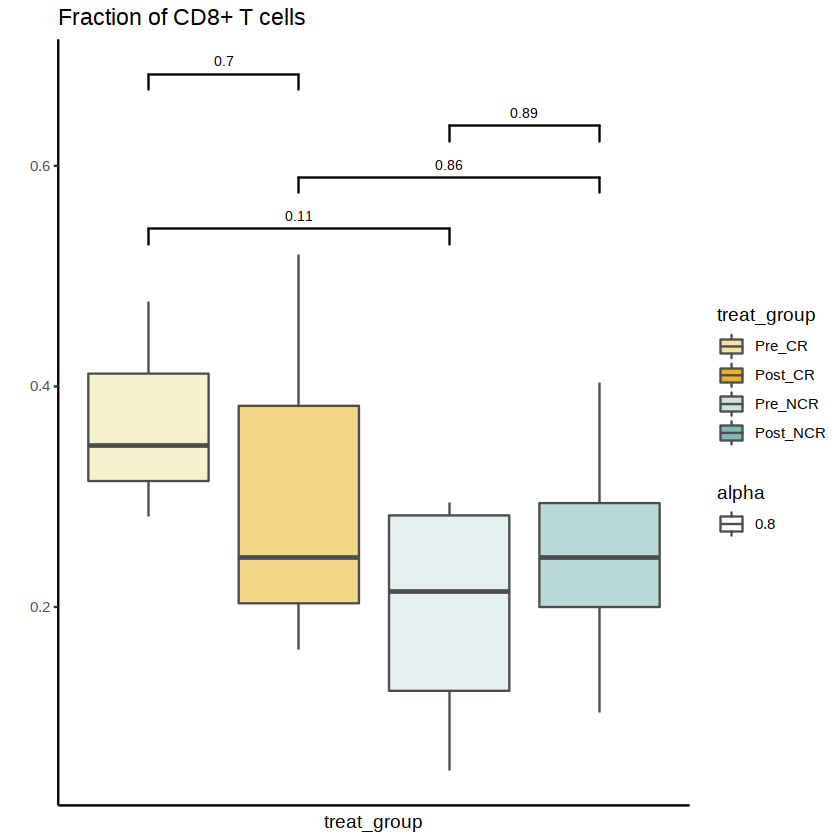

In [10]:
plot_data = data.frame(prop = sample_count$CD8_count/sample_count$CD45_count,
                       treat_group = factor(sample_count$treat_group, levels = c('Pre_CR','Post_CR','Pre_NCR','Post_NCR'))
                      )
plot_boxplot(plot_data, 'Fraction of CD8+ T cells')

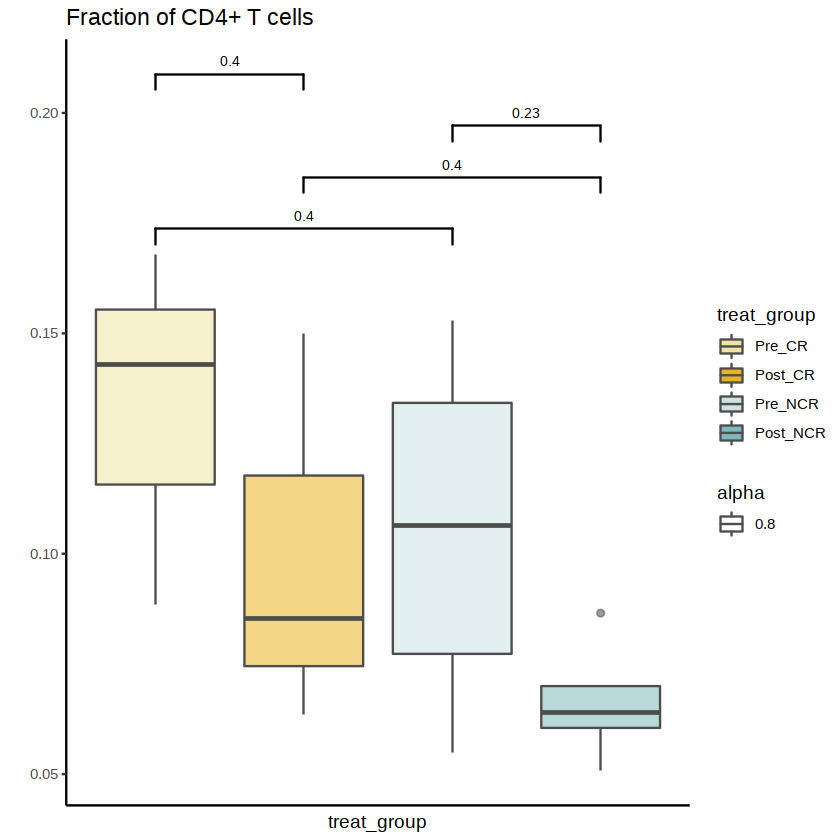

In [11]:
plot_data = data.frame(prop = sample_count$CD4_count/sample_count$CD45_count,
                       treat_group = factor(sample_count$treat_group, levels = c('Pre_CR','Post_CR','Pre_NCR','Post_NCR'))
                      )
plot_boxplot(plot_data, 'Fraction of CD4+ T cells')

## Proportion of sub clusters
* Figure 2H; Figure S2F

In [12]:
tsubs = unique(meta$subCluster[which(meta$majorCluster == 'T cells')])

In [13]:
sample_n = sample_count$CD45_count
names(sample_n) = sample_count$treat_sample

In [14]:
plots = list(mode='vector',length=length(tsubs))
i = 1
for( c in tsubs){
    plot_data = celltype_proportion(meta[which(meta$subCluster == c),], sample_n)  
    plots[[i]] = plot_boxplot(plot_data, paste0('Fraction of ',c))+NoLegend()
    i=i+1
}

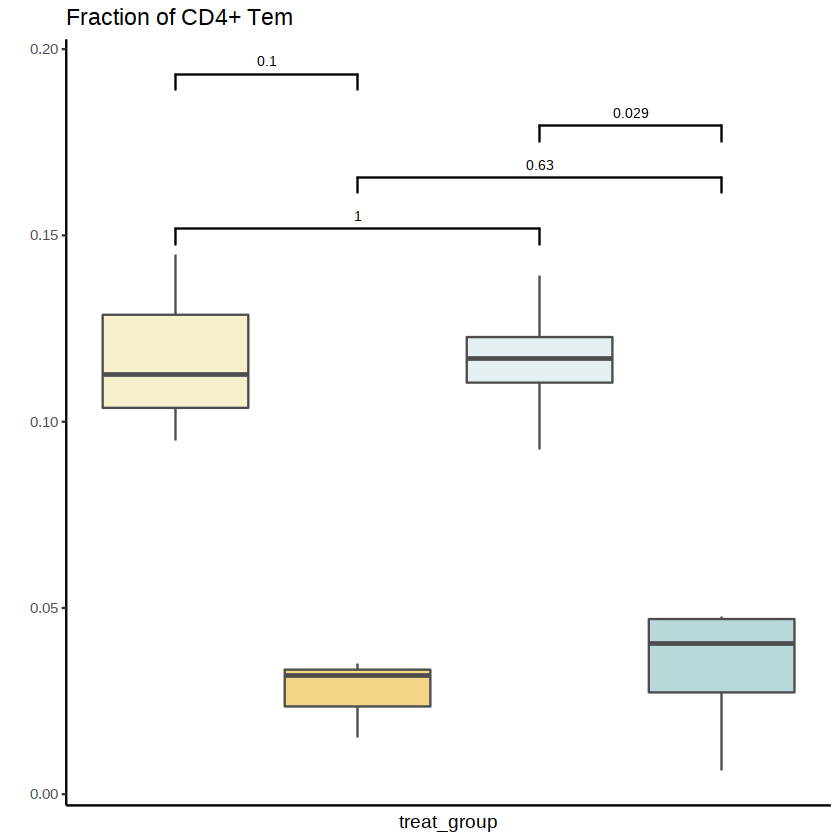

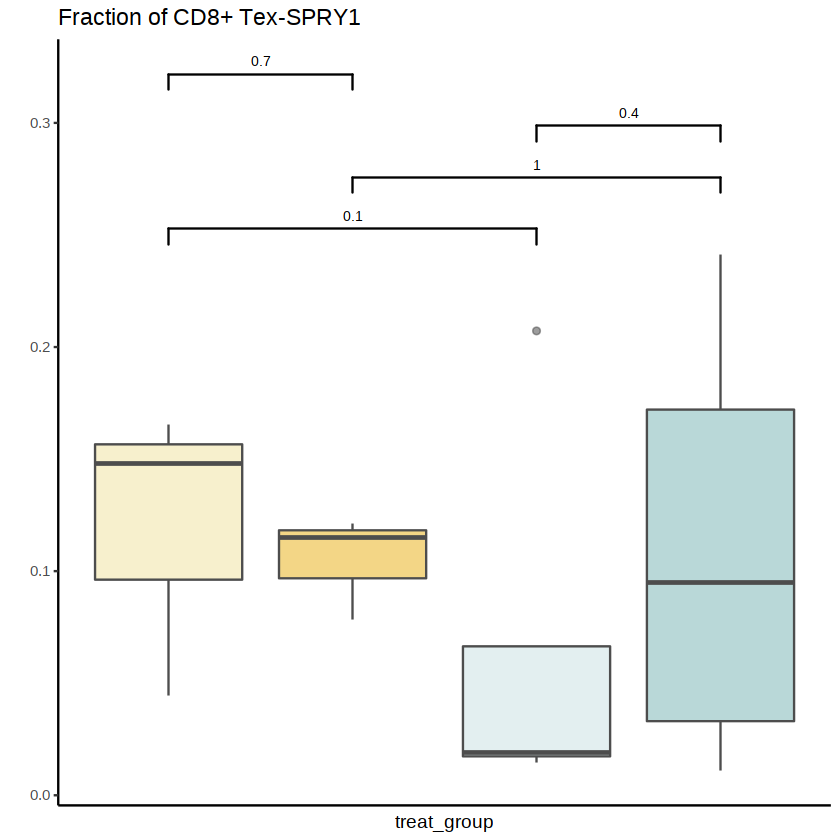

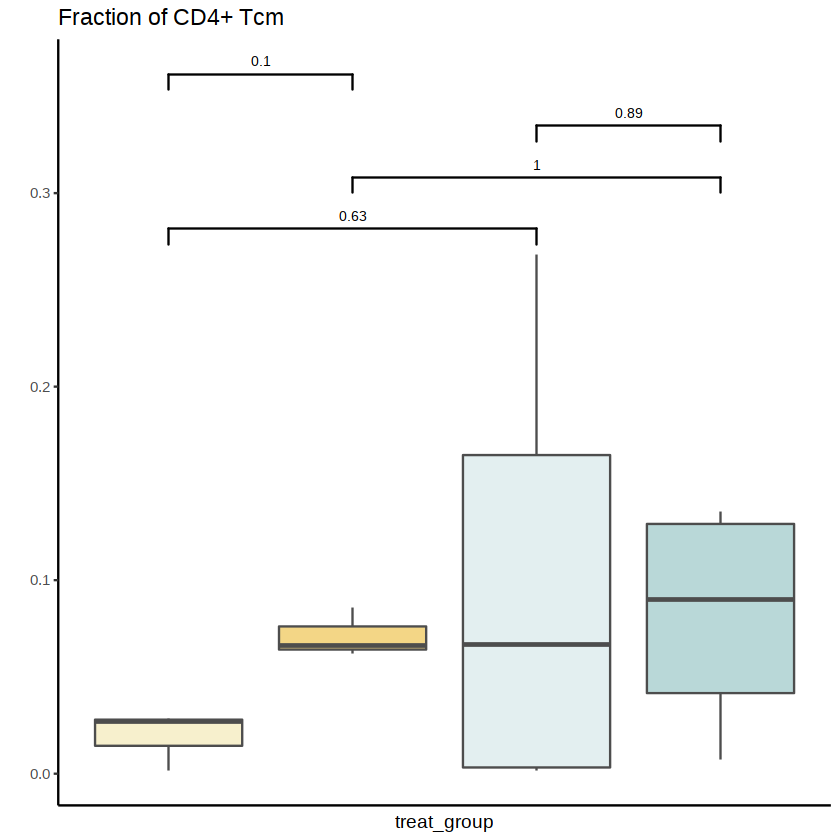

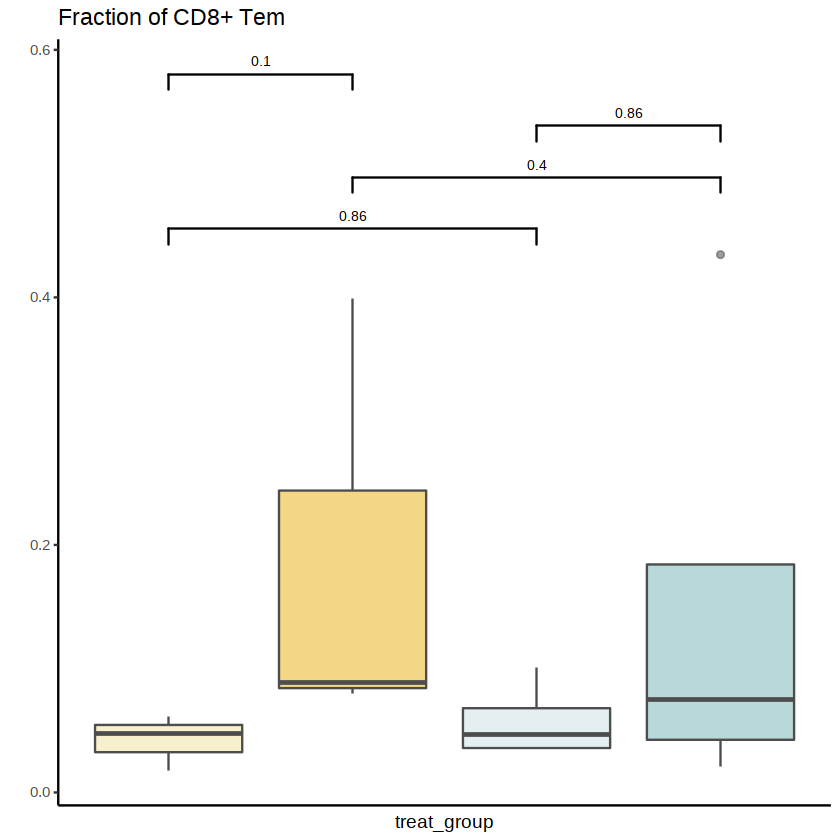

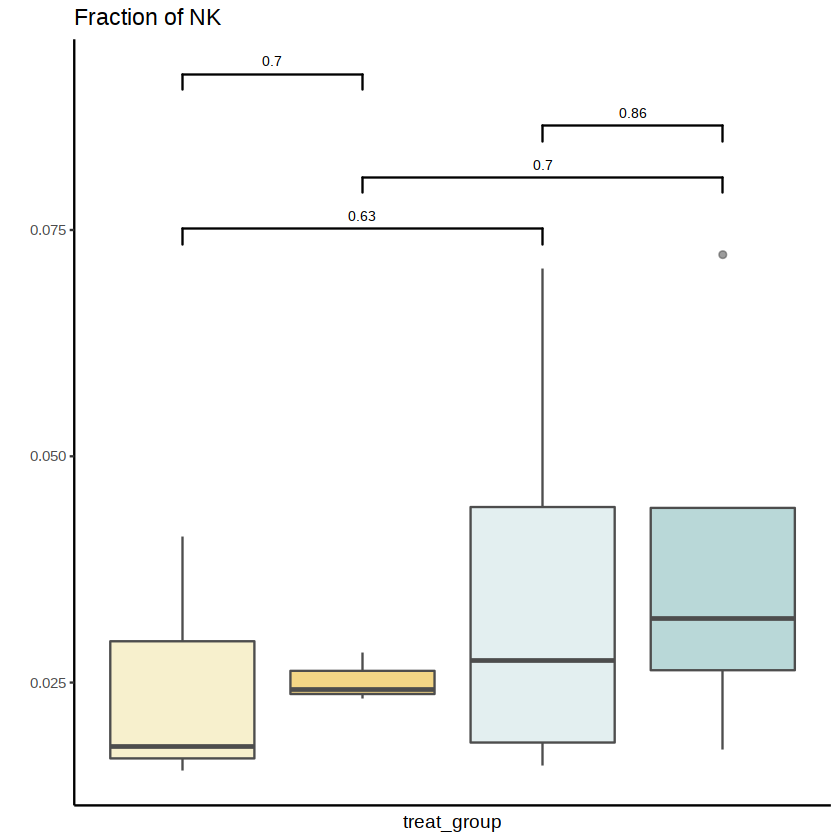

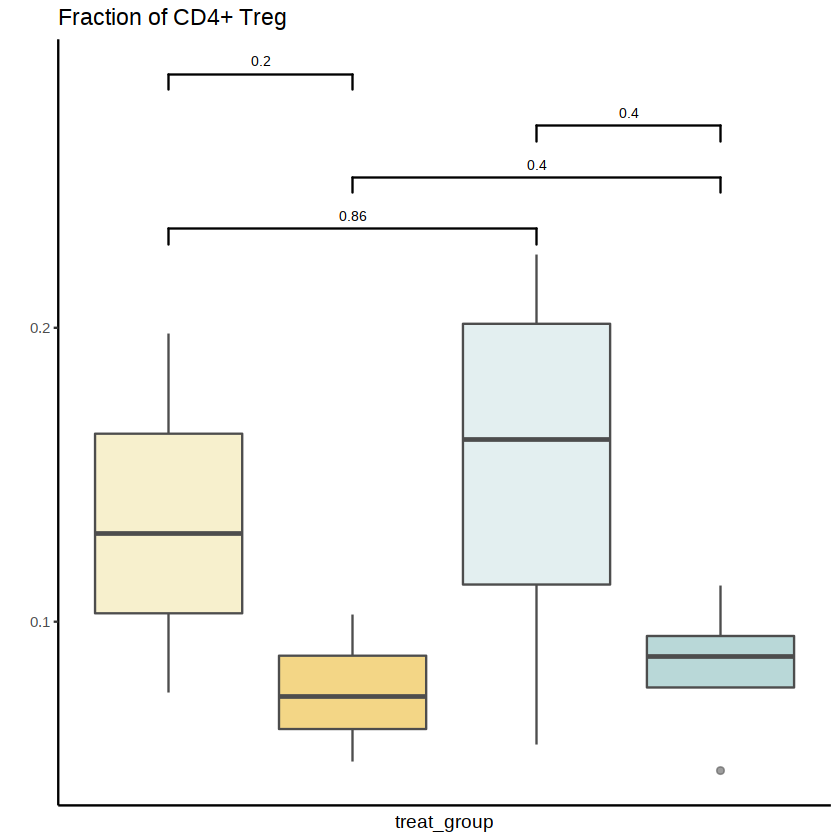

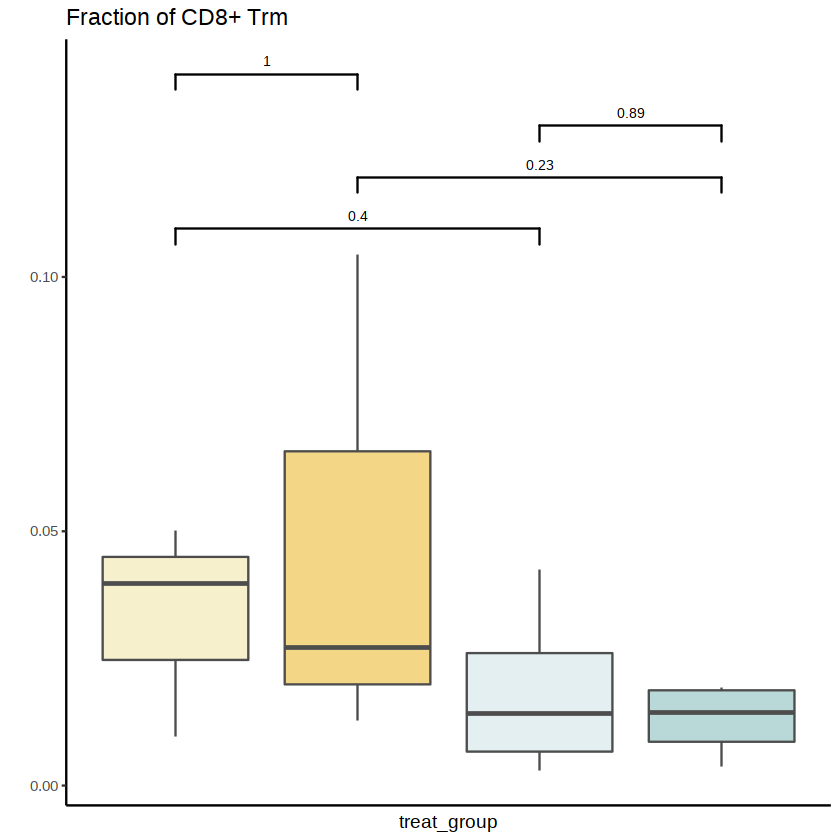

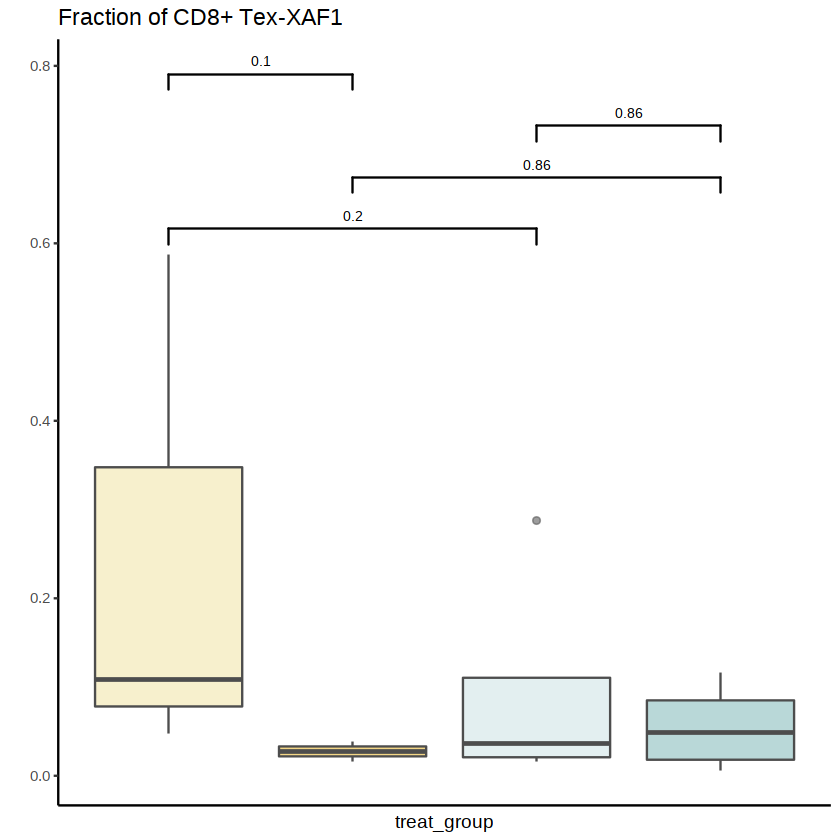

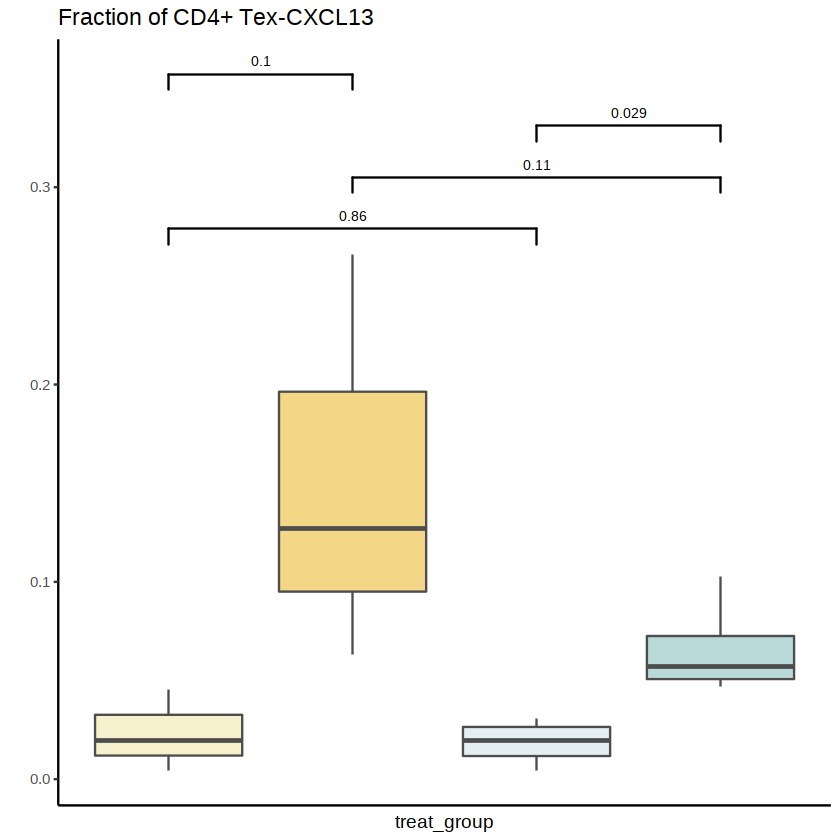

$mode

$length

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]

[[9]]

[[10]]

[[11]]


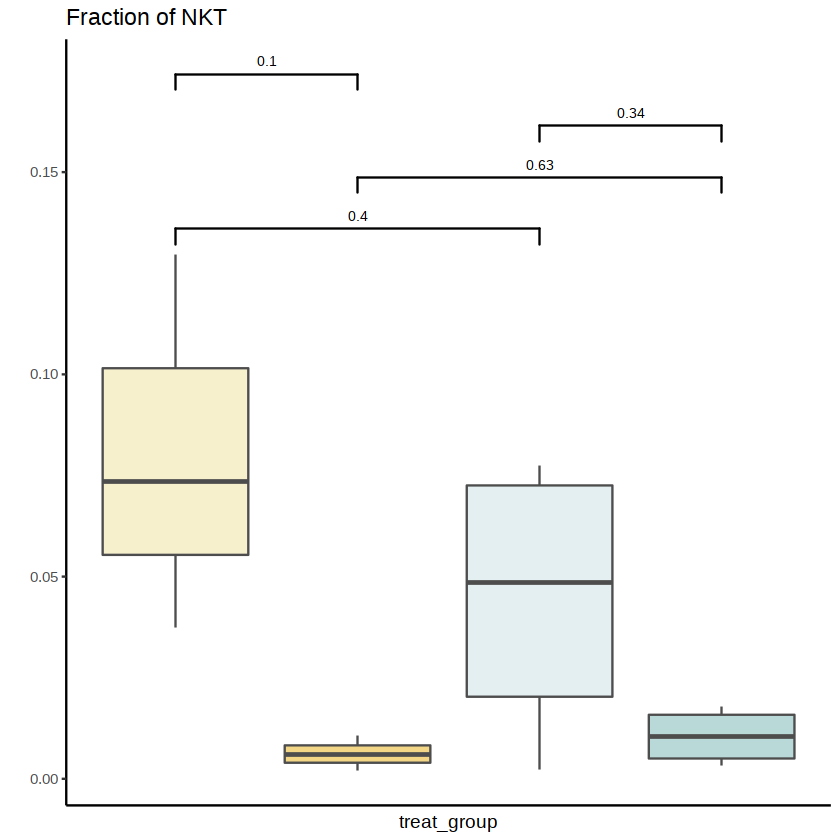

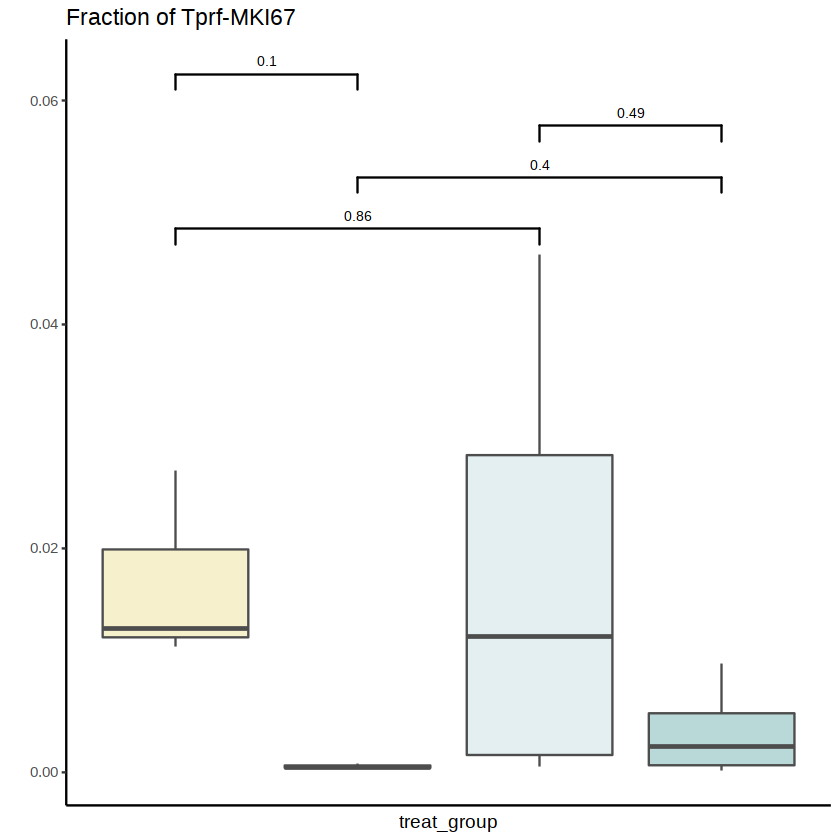

In [15]:
plots

## Correlations of Myeloid subsets with CD8+ Tex-SPRY1 cells
* Figure 5A

In [16]:
all_prop = read.csv(SUBCLUSTERS_COUNT_PATH,row.names=1,check.names = F)
treat = sapply(rownames(all_prop),function(x){
        strsplit(x, '_')[[1]][1]
})

In [17]:
mye_celltypes = c( 'Macro-CXCL1','Macro-FOLR2','Macro-MMP9','Macro-PDCL2','Macro-PLA2G2D','Macro-TUBA1B','Mast cells', 'mDC',
                    'Mono-CCL4', 'Mono-CD55', 'Mono-TXNIP','pDC','cDC1','cDC2','Neutrophils')

cor_data = all_prop[,c(mye_celltypes, 'CD8+ Tex-SPRY1')]/all_prop[,'CD45_count']
cor_data = cor_data[which(treat == 'Pre'),]
cor_data = apply(cor_data, 1, as.numeric)
pre_cor = cor(t(cor_data))
rownames(pre_cor) = c(mye_celltypes, 'CD8+ Tex-SPRY1')
colnames(pre_cor) = c(mye_celltypes, 'CD8+ Tex-SPRY1')
sort(pre_cor['CD8+ Tex-SPRY1',mye_celltypes],decreasing = T)

Macro-MMP9   Neutrophils     Mono-CCL4    Mast cells   Macro-CXCL1 
   0.82983345    0.53787097    0.46514643    0.40801715    0.38041114 
  Macro-FOLR2   Macro-PDCL2     Mono-CD55           mDC          cDC2 
   0.31129230    0.05614824   -0.03934889   -0.12066402   -0.22926469 
   Mono-TXNIP Macro-PLA2G2D  Macro-TUBA1B           pDC          cDC1 
  -0.32000023   -0.37708560   -0.50086748   -0.51495129   -0.72529085

In [18]:
plot_data = data.frame(sort(pre_cor['CD8+ Tex-SPRY1',mye_celltypes],decreasing = T))
colnames(plot_data) = 'cor'
plot_data$celltype = rownames(plot_data)
plot_data

,cor,celltype
,<dbl>,<chr>
Macro-MMP9,0.82983345,Macro-MMP9
Neutrophils,0.53787097,Neutrophils
Mono-CCL4,0.46514643,Mono-CCL4
Mast cells,0.40801715,Mast cells
Macro-CXCL1,0.38041114,Macro-CXCL1
Macro-FOLR2,0.31129230,Macro-FOLR2
Macro-PDCL2,0.05614824,Macro-PDCL2
Mono-CD55,-0.03934889,Mono-CD55
mDC,-0.12066402,mDC


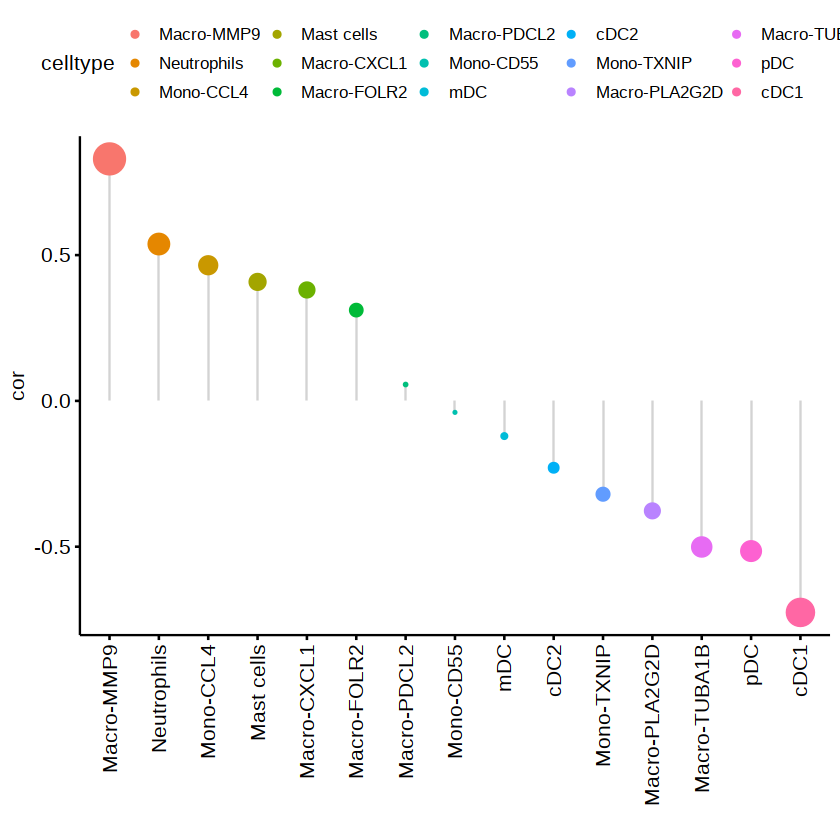

In [19]:
ggdotchart(plot_data, x = "celltype", y = "cor",
           color = "celltype",               
           add = "segments",    
           sorting = "descending",
           xlab="",
           dot.size = abs(plot_data$cor)*10
)

In [20]:
cor_data = all_prop[,c(mye_celltypes, 'CD8+ Tex-SPRY1')]/all_prop[,'CD45_count']
pre_cor_data = cor_data[which(treat == 'Pre'),]
rownames(pre_cor_data) = sapply(rownames(pre_cor_data), function(x){
    strsplit(x,split = '_')[[1]][2]
})
post_cor_data = cor_data[which(treat == 'Post'),]
rownames(post_cor_data) = sapply(rownames(post_cor_data), function(x){
    strsplit(x,split = '_')[[1]][2]
})
cor_data = post_cor_data - pre_cor_data[rownames(post_cor_data),]
cor_data = apply(cor_data, 1, as.numeric)

change_cor = cor(t(cor_data))
rownames(change_cor) = c(mye_celltypes, 'CD8+ Tex-SPRY1')
colnames(change_cor) = c(mye_celltypes, 'CD8+ Tex-SPRY1')

sort(change_cor['CD8+ Tex-SPRY1',mye_celltypes],decreasing = T)

Macro-MMP9   Macro-CXCL1     Mono-CCL4 Macro-PLA2G2D  Macro-TUBA1B 
   0.32633823    0.24811171    0.24685940    0.19728216    0.17148147 
   Mono-TXNIP     Mono-CD55    Mast cells   Neutrophils           pDC 
   0.13592602    0.12906199    0.05804698    0.04152836   -0.01096447 
         cDC2   Macro-FOLR2          cDC1           mDC   Macro-PDCL2 
  -0.04986020   -0.05084809   -0.14279961   -0.20446764   -0.24572881

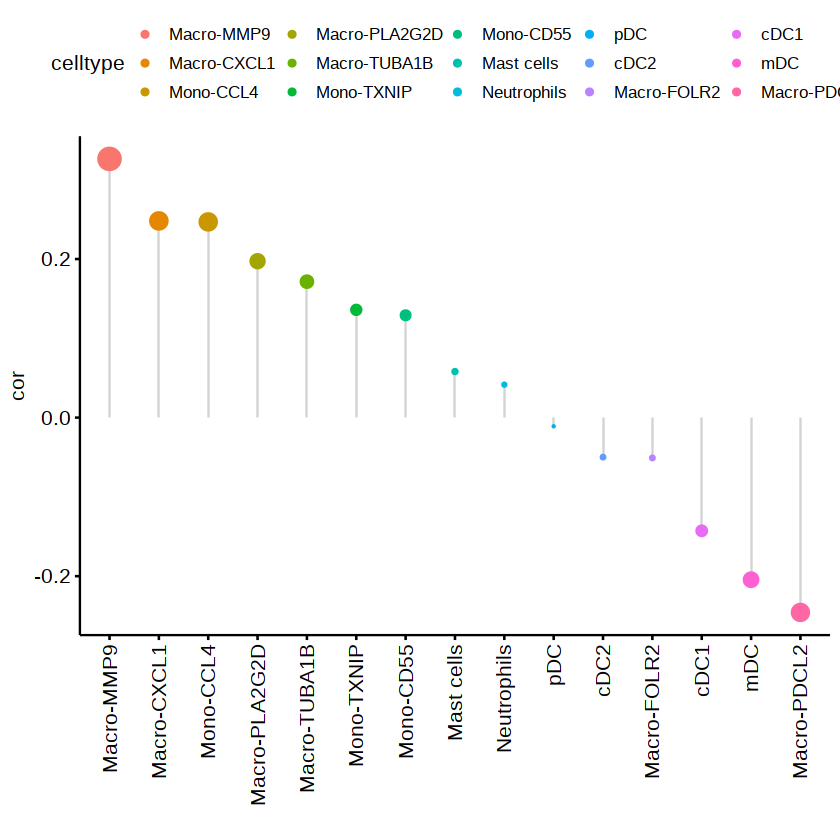

In [22]:
plot_data = data.frame(sort(change_cor['CD8+ Tex-SPRY1',mye_celltypes],decreasing = T))
colnames(plot_data) = 'cor'
plot_data$celltype = rownames(plot_data)

ggdotchart(plot_data, x = "celltype", y = "cor",
           color = "celltype",               
           add = "segments",    
           sorting = "descending",
           xlab="",
           dot.size = abs(plot_data$cor)*18
)